### Problema de clustering
En base al set de datos “wine_set.csv” realizar las siguientes tareas que comprenden un proyecto de problema de clustering:
1.	Chequear si en la base existen datos nulos.
2.	Chequear por outliers, en caso de que los haya, excluirlos.
3.	Realizar análisis exploratorio de datos (EDA).
4.	Estandarizar las variables.
5.	Separar en subconjuntos de entrenamiento y de prueba.
6.	Entrenar el o los modelos de clustering elegidos. 
7.	Exponer los resultados del modelo. 
8.	Exponer el modelo y los hiper-parámetros utilizados describiendo porque cree que son los mejores para el problema.
### Datos
- Alcohol: Alcohol
- Malic acid: Ácido málico
- Ash: madera
- Alcalinity of ash: Alcalinidad de la madera
- Magnesium: Magnesio
- Total phenols: Fenoles totales
- Flavanoids: Flavonoides
- Nonflavanoid phenols: Fenoles no flavonoides
- Proanthocyanins: Proantocianidinas
- Color intensity: Intensidad de color
- Hue: Matiz
- OD280/OD315 of diluted wines: índice de absorbancia
- Proline: Prolina


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

In [5]:
# mint path
wine = '/home/jorge/Programacion/Ciencia Datos/IFTS11/Ciencia de Datos 2024/Entrega/CienciaDatos/wine_set.csv'
wine = pd.read_csv(wine)

In [6]:
# windows path
# ruta_w = 'C:/Users/yorlu/OneDrive - UTN.BA/Academico/IFTS11-CdD_IA-1/Cursada 2024 IFTS/3er Cuatrimestre/2- Ciencia de datos/Practica/ParcialCienciaDatos/Segundo Parcial/'
# wine = pd.read_csv(ruta_w + 'wine_set.csv')

In [15]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine.describe

<bound method NDFrame.describe of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue

In [9]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [18]:
wine.shape

(178, 13)

In [23]:
wine.dtypes.value_counts()

float64    11
int64       2
Name: count, dtype: int64

In [25]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

# 1-Chequear si en la base existen datos nulos

In [11]:
# verificamos valores nulos
for column in wine.columns:
    valores_nulos = wine[column].isnull().sum()
    print(f'La columna {column} tiene {valores_nulos} valores nulos.')

La columna Alcohol tiene 0 valores nulos.
La columna Malic_Acid tiene 0 valores nulos.
La columna Ash tiene 0 valores nulos.
La columna Ash_Alcanity tiene 0 valores nulos.
La columna Magnesium tiene 0 valores nulos.
La columna Total_Phenols tiene 0 valores nulos.
La columna Flavanoids tiene 0 valores nulos.
La columna Nonflavanoid_Phenols tiene 0 valores nulos.
La columna Proanthocyanins tiene 0 valores nulos.
La columna Color_Intensity tiene 0 valores nulos.
La columna Hue tiene 0 valores nulos.
La columna OD280 tiene 0 valores nulos.
La columna Proline tiene 0 valores nulos.


In [12]:
# verificamos valores NaN
for column in wine.columns:
    tiene_nan = wine[column].isnull().any()
    print(f'La columna {column} tiene valores NaN: {tiene_nan}')

La columna Alcohol tiene valores NaN: False
La columna Malic_Acid tiene valores NaN: False
La columna Ash tiene valores NaN: False
La columna Ash_Alcanity tiene valores NaN: False
La columna Magnesium tiene valores NaN: False
La columna Total_Phenols tiene valores NaN: False
La columna Flavanoids tiene valores NaN: False
La columna Nonflavanoid_Phenols tiene valores NaN: False
La columna Proanthocyanins tiene valores NaN: False
La columna Color_Intensity tiene valores NaN: False
La columna Hue tiene valores NaN: False
La columna OD280 tiene valores NaN: False
La columna Proline tiene valores NaN: False


In [14]:
# si contiene valores vacios
for column in wine.columns:
    tiene_vacios = wine[column].eq('').any()
    print(f'La columna {column} tiene valores vacíos: {tiene_vacios}')

La columna Alcohol tiene valores vacíos: False
La columna Malic_Acid tiene valores vacíos: False
La columna Ash tiene valores vacíos: False
La columna Ash_Alcanity tiene valores vacíos: False
La columna Magnesium tiene valores vacíos: False
La columna Total_Phenols tiene valores vacíos: False
La columna Flavanoids tiene valores vacíos: False
La columna Nonflavanoid_Phenols tiene valores vacíos: False
La columna Proanthocyanins tiene valores vacíos: False
La columna Color_Intensity tiene valores vacíos: False
La columna Hue tiene valores vacíos: False
La columna OD280 tiene valores vacíos: False
La columna Proline tiene valores vacíos: False


# 2-Chequear por outliers, en caso de que los haya, excluirlos 

In [34]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1

inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

outliers = wine[((wine < inferior) | (wine > superior)).any(axis=1)]
print(f'Cantidad de outliers que se van a excluir: {len(outliers)}')

Cantidad de outliers que se van a excluir: 2


Habiendo poca cantidad de outliers, se decide excluirlos

In [38]:
# excluimos los outliers
wine = wine[~((wine < inferior) | (wine > superior)).any(axis=1)]


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# 3- EDA (Analisis Exploratorio de datos)

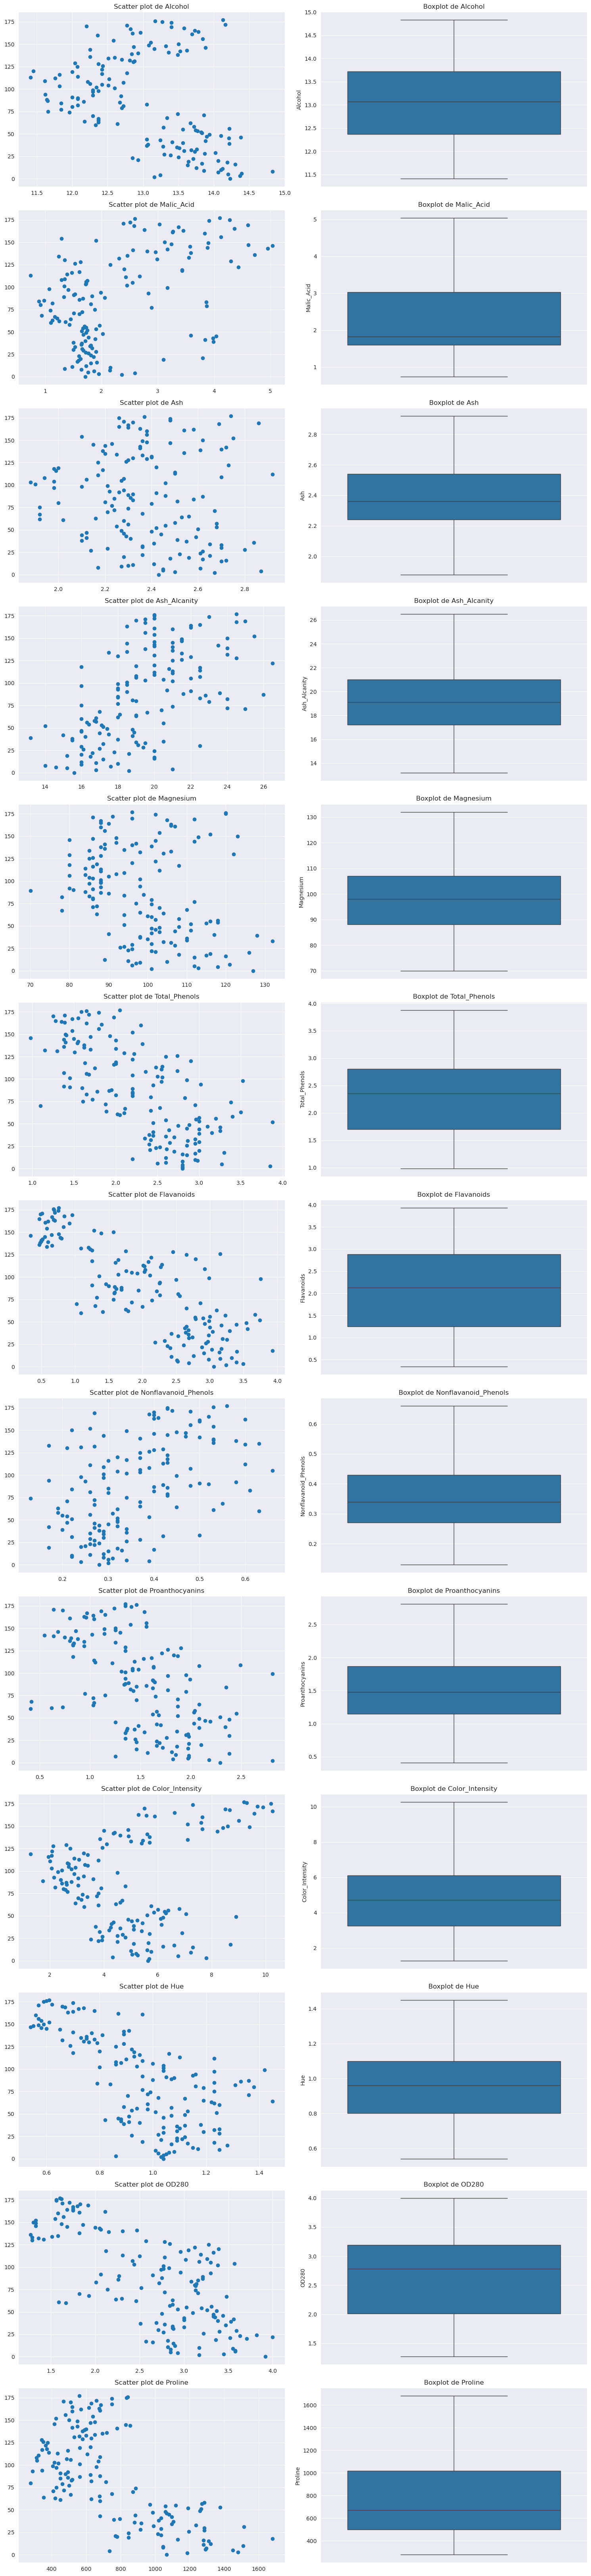

In [42]:
fig, axs = plt.subplots(len(wine.columns), 2, figsize=(15, len(wine.columns)*5))

for i, column in enumerate(wine.columns):
    
    axs[i, 0].scatter(wine[column], wine.index)
    axs[i, 0].set_title(f'Scatter plot de {column}')

    
    sns.boxplot(y=wine[column], ax=axs[i, 1], orient='v')
    axs[i, 1].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

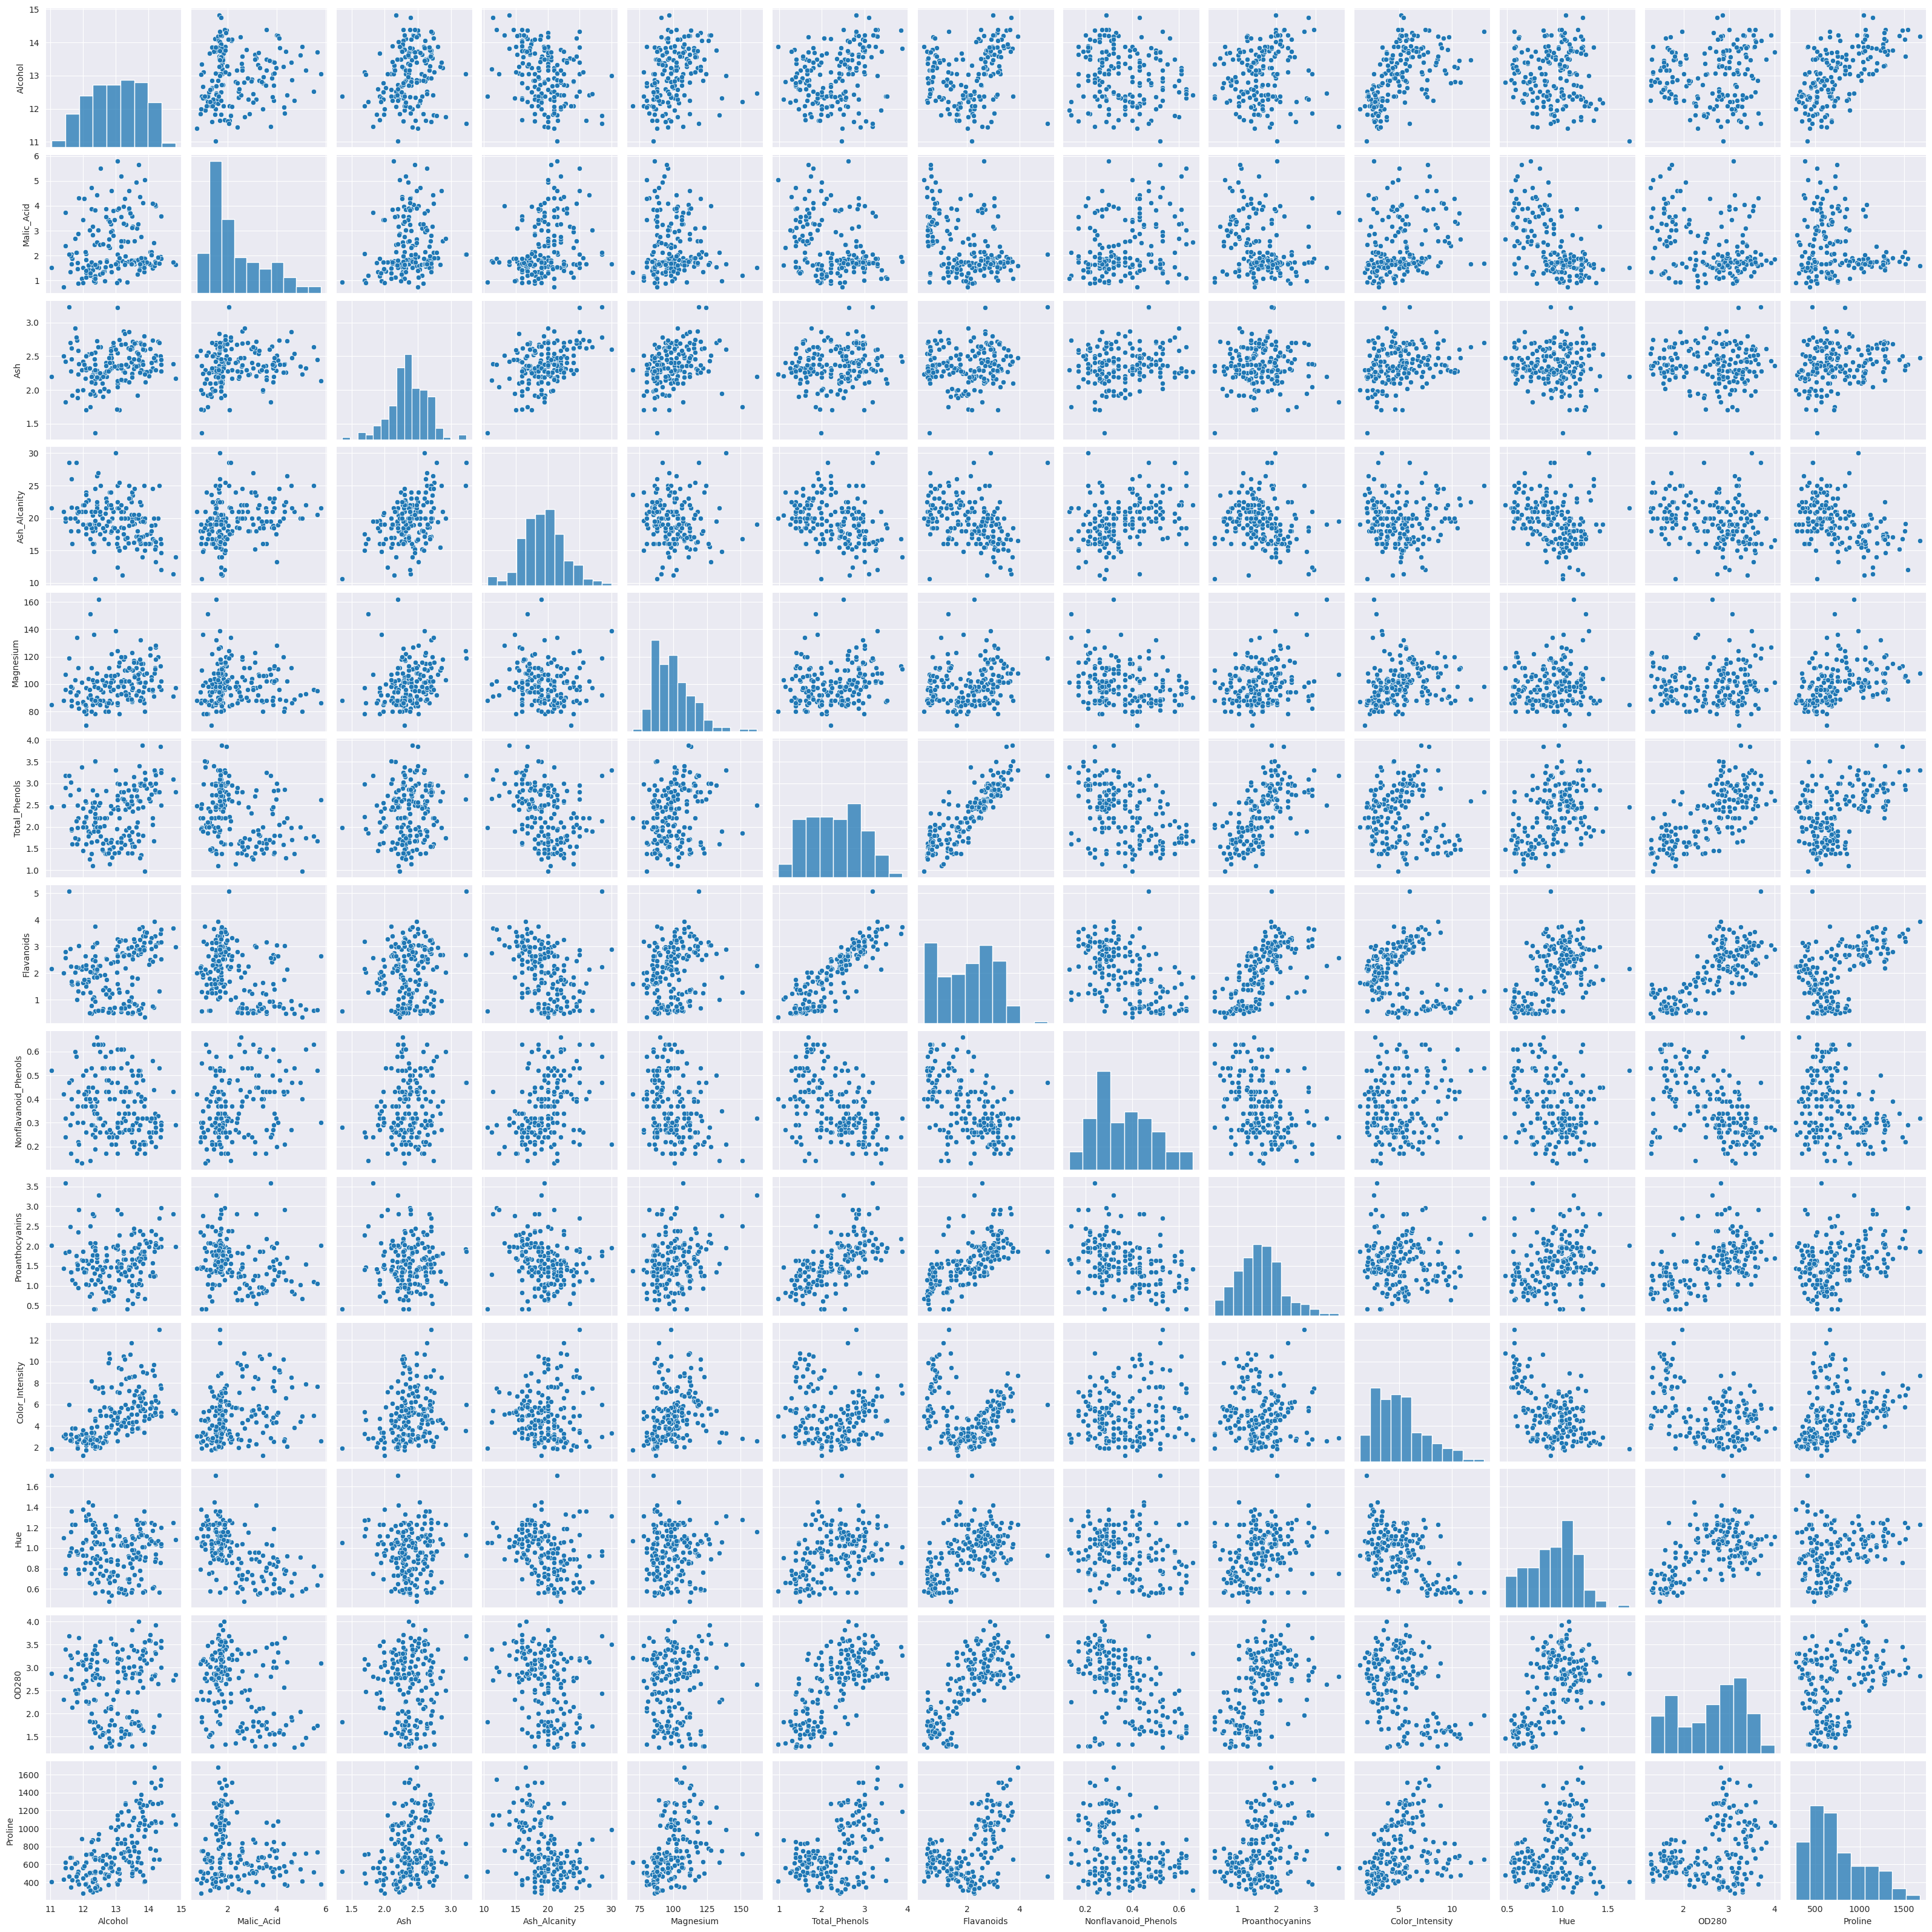

In [21]:
sns.pairplot(wine)
plt.show()

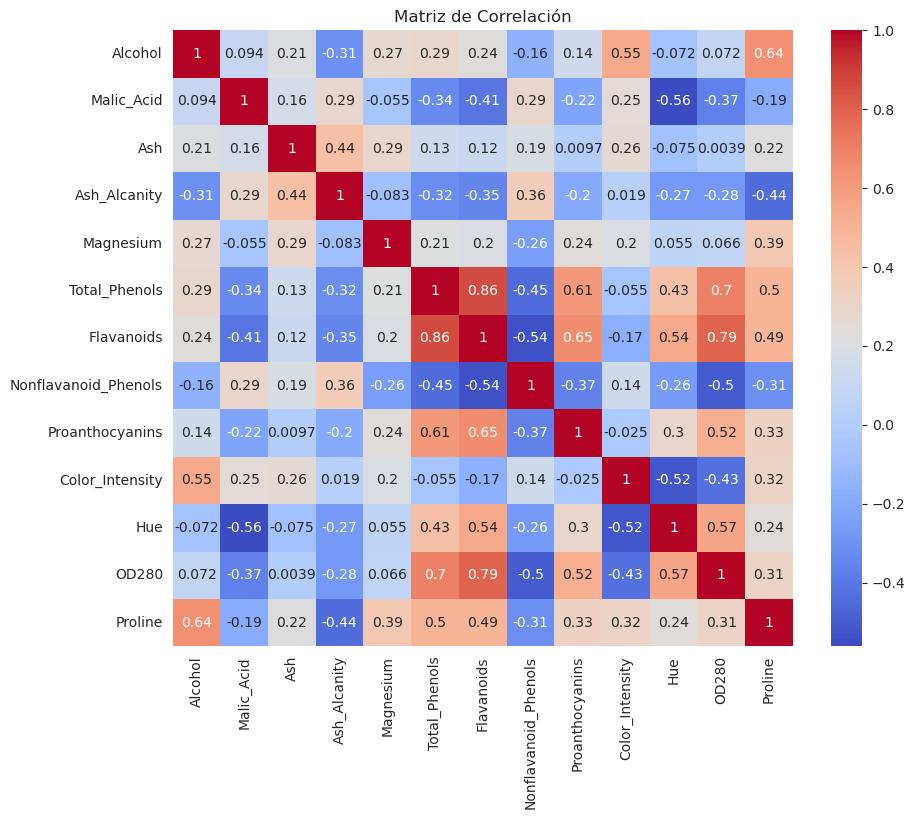

In [22]:
corr_matrix = wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()